In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo

import pandas as pd

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
STATION_LINE = ['LA' , 'LB', 'LBA', 'LC', 'LCB', 'RS']

numbers_LA = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', '1O']

numbers_LB = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', '1O', '11', '12', '13', '14', '15', '16']

numbers_LBA = ['O', '1', '2', '3', '4']

numbers_LC = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', '1O', '11', '12']

numbers_LCB = ['1', '2', '3', '4', '5', '6']

numbers_RS = ['O1' , 'O2', 'O3', 'O4', 'O5', 'O6', 'O7']


lon_stations_LA = [-124.7275, -124.8553, -124.9620, -125.0687, \
           -125.1767, -125.2867, -125.3977, -125.5067, -125.6153, -125.7233]
lat_stations_LA = [48.4872, 48.4375, 48.3807, 48.3227, 48.2680, 48.2105, 48.1533, 48.0963, 48.0393, 47.9837]



lon_stations_LB = [-124.9913, -125.0400, -125.0930, -125.1453, -125.2000, -125.2585, -125.3683, \
                  -125.4775, -125.5800, -125.6892, -125.7958, -125.8650, -125.9353, -126.0000, -126.1410, -126.2833]
lat_stations_LB = [48.6733, 48.6500, 48.6220, 48.5945, 48.5667, 48.5363, 48.4780, 48.4217, 48.3667, \
                  48.3095, 48.2533, 48.2153, 48.1767, 48.1413, 48.0727, 48.0088]



lon_stations_LBA = [-124.9667, -125.0633, -125.1300, -125.3467, -125.5000]
lat_stations_LBA = [48.5767, 48.5283, 48.4233, 48.3908, 48.2153]



lon_stations_LC = [-125.4622, -125.5158, -125.5707, -125.6800, -125.7900, -125.9000, -126.0083, -126.1183, \
                  -126.2283, -126.3367, -126.4450, -126.6667]
lat_stations_LC = [48.8407, 48.8113, 48.7825, 48.7238, 48.6657, 48.6077, 48.5493, 48.4908, 48.4323,\
                   48.3733, 48.3158, 48.2500]

lon_stations_LCB = [-125.3667, -125.4508, -125.5000, -125.5917, -125.8300, -126.0633]
lat_stations_LCB = [48.7490, 48.6858, 48.5750, 48.5333, 48.4717, 48.3783]


lon_stations_RS = [-125.2233, -125.3267, -125.4317, -125.5683, -125.7200, -125.9433, -126.1317]
lat_stations_RS = [48.7567, 48.7092, 48.6433, 48.5683, 48.4867, 48.3633, 48.2600]


date_stations_LA = ['','','','23 Aug','','1 Aug', '','','', '']
date_stations_LB = ['20 Aug', '20 Aug', '', '20 Aug', '', '20 Aug', '', '20 Aug', '23 July', '', '', '24 Aug','','','','']


In [3]:
LINE_LA_stations  = []
LINE_LB_stations  = []
LINE_LBA_stations = []
LINE_LC_stations  = []
LINE_LCB_stations  = []
LINE_RS_stations  = []

for i in np.arange(len(numbers_LA)):
    value = STATION_LINE[0]+numbers_LA[i]
    LINE_LA_stations = np.append(LINE_LA_stations, value)
    
for i in np.arange(len(numbers_LB)):
    value = STATION_LINE[1]+numbers_LB[i]
    LINE_LB_stations = np.append(LINE_LB_stations, value)
    
for i in np.arange(len(numbers_LBA)):
    value = STATION_LINE[2]+numbers_LBA[i]
    LINE_LBA_stations = np.append(LINE_LBA_stations, value)
    
for i in np.arange(len(numbers_LC)):
    value = STATION_LINE[3]+numbers_LC[i]
    LINE_LC_stations = np.append(LINE_LC_stations, value)

for i in np.arange(len(numbers_LCB)):
    value = STATION_LINE[4]+numbers_LCB[i]
    LINE_LCB_stations = np.append(LINE_LCB_stations, value)
    
for i in np.arange(len(numbers_RS)):
    value = STATION_LINE[5]+numbers_RS[i]
    LINE_RS_stations = np.append(LINE_RS_stations, value)
    
    
LA_lon_locations = pd.Series(data = lon_stations_LA, index = LINE_LA_stations)
LA_lat_locations = pd.Series(data = lat_stations_LA, index = LINE_LA_stations)    
        
LB_lon_locations = pd.Series(data = lon_stations_LB, index = LINE_LB_stations)
LB_lat_locations = pd.Series(data = lat_stations_LB, index = LINE_LB_stations)

LBA_lon_locations = pd.Series(data = lon_stations_LBA, index = LINE_LBA_stations)
LBA_lat_locations = pd.Series(data = lat_stations_LBA, index = LINE_LBA_stations)

LC_lon_locations = pd.Series(data = lon_stations_LC, index = LINE_LC_stations)
LC_lat_locations = pd.Series(data = lat_stations_LC, index = LINE_LC_stations)

LCB_lon_locations = pd.Series(data = lon_stations_LCB, index = LINE_LCB_stations)
LCB_lat_locations = pd.Series(data = lat_stations_LCB, index = LINE_LCB_stations)

RS_lon_locations = pd.Series(data = lon_stations_RS, index = LINE_RS_stations)
RS_lat_locations = pd.Series(data = lat_stations_RS, index = LINE_RS_stations)


line_LA = pd.DataFrame({'longitude': lon_stations_LA, 'latitude': lat_stations_LA, 'Date': date_stations_LA}, index = LINE_LA_stations)

line_LB = pd.DataFrame({'longitude': lon_stations_LB, 'latitude': lat_stations_LB, 'Date': date_stations_LB}, index = LINE_LB_stations)

line_LC = pd.DataFrame({'longitude': lon_stations_LC, 'latitude': lat_stations_LC}, index = LINE_LC_stations)

In [4]:
def find_spice_density(df,line):
    
    if line == 'LA':
        lat = np.mean(lat_stations_LA)
        lon = np.mean(lon_stations_LA)
        
    if line == 'LB':
        lat = np.mean(lat_stations_LB)
        lon = np.mean(lon_stations_LB)
        
    if line == 'LC':
        lat = np.mean(lat_stations_LC)
        lon = np.mean(lon_stations_LC)
        
    if line == 'LBA':
        lat = np.mean(lat_stations_LBA)  
        lon = np.mean(lon_stations_LBA)
        
    if line == 'LCB':
        lat = np.mean(lat_stations_LCB)
        lon = np.mean(lon_stations_LCB)
        
    if line == 'RS':
        lat = np.mean(lat_stations_RS)
        lon = np.mean(lon_stations_RS)
        
    import gsw
        
    pressure = df.as_matrix(columns=['Pressure'])
    SP = df.as_matrix(columns= ['Salinity'])
    PT = df.as_matrix(columns = ['Temperature'])
    
    
    z  = gsw.z_from_p(-pressure, lat)
    
    SA = gsw.SA_from_SP(SP, pressure, lon, lat)
    
    CT = gsw.CT_from_pt(SP, PT)
    
    spic = gsw.spiciness0(SA, CT)
    
    z = np.reshape(a=z,newshape=np.max(z.shape))
    spic = np.reshape(a=spic,newshape=np.max(spic.shape))
    
    
    df['Depth'] = pd.Series(data = z, index=df.index)
    
    df['Spice'] = pd.Series(data= spic, index = df.index)
    
    return df


def find_NEP36_model_point(line, station_number):
    if line == 'LA':
        loc = np.where(LINE_LA_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LA[int(loc[0])],lat_stations_LA[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

    if line == 'LB':
        loc = np.where(LINE_LB_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LB[int(loc[0])],lat_stations_LB[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'LC':
        loc = np.where(LINE_LC_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LC[int(loc[0])],lat_stations_LC[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'LBA':
        loc = np.where(LINE_LBA_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LBA[int(loc[0])],lat_stations_LBA[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'LCB':
        loc = np.where(LINE_LCB_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_LCB[int(loc[0])],lat_stations_LCB[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    if line == 'RS':
        loc = np.where(LINE_RS_stations == station_number)
        j, i = geo_tools.find_closest_model_point(lon_stations_RS[int(loc[0])],lat_stations_RS[int(loc[0])],\
                                                  lon_model,lat_model,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
        
    return j,i
        
    
    

In [5]:
LA_04_data = pd.read_table('/data/ssahu/IOS_data/Line_LA/2015-07-23_time_21-13-31_LA04.csv',delim_whitespace=1,header = None, skiprows=7)#, names=['Pressure', 'Temperature', 'Salinity'])

LA_04_data.columns = ['Pressure', 'Temperature', 'Fluorescence','Salinity','O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']

LA_04_data = LA_04_data.drop('Fluorescence',axis =1)
LA_04_data = LA_04_data.drop('O2 (dissolved)', axis=1)
LA_04_data = LA_04_data.drop('O2(dissolved SBE)', axis=1)
LA_04_data = LA_04_data.drop('PH', axis=1)
LA_04_data = LA_04_data.drop('No. of Bin Records', axis=1)


LA_04_data = find_spice_density(LA_04_data, line = 'LA')

LA_04_data.tail(10)



,Pressure,Temperature,Salinity,Depth,Spice
172,176.0,6.876,33.8440,174.594267,-0.086476
173,177.0,6.874,33.8447,175.586708,-0.086245
174,178.0,6.872,33.8452,176.579153,-0.086158
175,179.0,6.872,33.8462,177.571604,-0.085418
176,180.0,6.873,33.8467,178.564059,-0.084892
177,181.0,6.874,33.8471,179.556519,-0.084438
178,182.0,6.875,33.8477,180.548984,-0.083840
179,183.0,6.877,33.8487,181.541453,-0.082809
180,184.0,6.879,33.8494,182.533928,-0.081993
181,185.0,6.880,33.8499,183.526407,-0.081467


In [6]:
LA_06_data = pd.read_table('/data/ssahu/IOS_data/Line_LA/LA06_1Aug.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LA_06_data.columns = ['Pressure', 'Temperature', 'Fluorescence','Salinity','O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']

LA_06_data = LA_06_data.drop('Fluorescence',axis =1)
LA_06_data = LA_06_data.drop('O2 (dissolved)', axis=1)
LA_06_data = LA_06_data.drop('O2(dissolved SBE)', axis=1)
LA_06_data = LA_06_data.drop('PH', axis=1)
LA_06_data = LA_06_data.drop('No. of Bin Records', axis=1)

LA_06_data = find_spice_density(LA_06_data, line = 'LA')

LA_06_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
96,100.0,7.314,33.7905,99.182936,-0.061334
97,101.0,7.311,33.7922,100.175009,-0.060539
98,102.0,7.306,33.7938,101.167087,-0.060120
99,103.0,7.302,33.7953,102.159170,-0.059622
100,104.0,7.290,33.8004,103.151257,-0.057738
101,105.0,7.284,33.8029,104.143350,-0.056820
102,106.0,7.281,33.8039,105.135447,-0.056531
103,107.0,7.280,33.8041,106.127549,-0.056516
104,108.0,7.280,33.8042,107.119656,-0.056423
105,109.0,7.280,33.8043,108.111768,-0.056330


In [7]:
LB_01_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB01_20AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LB_01_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_01_data = LB_01_data.drop('Fluorescence',axis =1)
LB_01_data = LB_01_data.drop('O2 (dissolved)', axis=1)
LB_01_data = LB_01_data.drop('O2(dissolved SBE)', axis=1)
LB_01_data = LB_01_data.drop('Transmissivity', axis=1)
LB_01_data = LB_01_data.drop('PAR', axis=1)
LB_01_data = LB_01_data.drop('No. of Bin Records', axis=1)

LB_01_data = find_spice_density(LB_01_data, line = 'LB')

LB_01_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
22,25.0,10.0594,32.2060,24.790889,-0.759618
23,26.0,10.0658,32.2097,25.782588,-0.755830
24,27.0,10.0654,32.2100,26.774291,-0.755706
25,28.0,10.0665,32.2106,27.765999,-0.755101
26,29.0,10.0709,32.2129,28.757711,-0.752680
27,30.0,10.0748,32.2152,29.749429,-0.750348
28,31.0,10.0755,32.2162,30.741151,-0.749501
29,32.0,10.0768,32.2173,31.732878,-0.748476
30,33.0,10.0742,32.2234,32.724610,-0.744504
31,34.0,10.0366,32.2403,33.716347,-0.738831


In [8]:
LB_02_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB02_20AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LB_02_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_02_data = LB_02_data.drop('Fluorescence',axis =1)
LB_02_data = LB_02_data.drop('O2 (dissolved)', axis=1)
LB_02_data = LB_02_data.drop('O2(dissolved SBE)', axis=1)
LB_02_data = LB_02_data.drop('Transmissivity', axis=1)
LB_02_data = LB_02_data.drop('PAR', axis=1)
LB_02_data = LB_02_data.drop('No. of Bin Records', axis=1)

LB_02_data = find_spice_density(LB_02_data, line = 'LB')

LB_02_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
40,43.0,9.7651,32.3599,42.642195,-0.699290
41,44.0,9.7452,32.3679,43.633980,-0.696920
42,45.0,9.7407,32.3699,44.625770,-0.696243
43,46.0,9.7402,32.3702,45.617564,-0.696108
44,47.0,9.7398,32.3706,46.609364,-0.695883
45,48.0,9.7395,32.3711,47.601168,-0.695569
46,49.0,9.7396,32.3711,48.592977,-0.695548
47,50.0,9.7390,32.3715,49.584791,-0.695358
48,51.0,9.7367,32.3738,50.576610,-0.694071
49,52.0,9.7339,32.3751,51.568433,-0.693595


In [9]:
LB_04_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB04_20AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LB_04_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_04_data = LB_04_data.drop('Fluorescence',axis =1)
LB_04_data = LB_04_data.drop('O2 (dissolved)', axis=1)
LB_04_data = LB_04_data.drop('O2(dissolved SBE)', axis=1)
LB_04_data = LB_04_data.drop('Transmissivity', axis=1)
LB_04_data = LB_04_data.drop('PAR', axis=1)
LB_04_data = LB_04_data.drop('No. of Bin Records', axis=1)

LB_04_data = find_spice_density(LB_04_data, line = 'LB')

LB_04_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
93,95.0,7.7457,33.4852,94.221412,-0.215450
94,96.0,7.7189,33.5017,95.213448,-0.207674
95,97.0,7.7060,33.5104,96.205489,-0.203370
96,98.0,7.6947,33.5183,97.197534,-0.199395
97,99.0,7.6802,33.5287,98.189585,-0.194110
98,100.0,7.6599,33.5434,99.181640,-0.186617
99,101.0,7.6148,33.5756,100.173700,-0.170321
100,102.0,7.5942,33.5890,101.165765,-0.163804
101,103.0,7.5837,33.5947,102.157835,-0.161286
102,104.0,7.5772,33.5988,103.149909,-0.159306


In [10]:
LB_06_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB06_20AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LB_06_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_06_data = LB_06_data.drop('Fluorescence',axis =1)
LB_06_data = LB_06_data.drop('O2 (dissolved)', axis=1)
LB_06_data = LB_06_data.drop('O2(dissolved SBE)', axis=1)
LB_06_data = LB_06_data.drop('Transmissivity', axis=1)
LB_06_data = LB_06_data.drop('PAR', axis=1)
LB_06_data = LB_06_data.drop('No. of Bin Records', axis=1)

LB_06_data = find_spice_density(LB_06_data, line = 'LB')

LB_06_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
95,97.0,7.2592,33.7742,96.205489,-0.081402
96,98.0,7.2569,33.7749,97.197534,-0.081219
97,99.0,7.2560,33.7749,98.189585,-0.081330
98,100.0,7.2547,33.7754,99.181640,-0.081140
99,101.0,7.2537,33.7758,100.173700,-0.080978
100,102.0,7.2525,33.7764,101.165765,-0.080705
101,103.0,7.2523,33.7765,102.157835,-0.080641
102,104.0,7.2519,33.7766,103.149909,-0.080608
103,105.0,7.2512,33.7769,104.141989,-0.080476
104,106.0,7.2505,33.7770,105.134073,-0.080487


In [11]:
LB_08_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB08_20AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LB_08_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_08_data = LB_08_data.drop('Fluorescence',axis =1)
LB_08_data = LB_08_data.drop('O2 (dissolved)', axis=1)
LB_08_data = LB_08_data.drop('O2(dissolved SBE)', axis=1)
LB_08_data = LB_08_data.drop('Transmissivity', axis=1)
LB_08_data = LB_08_data.drop('PAR', axis=1)
LB_08_data = LB_08_data.drop('No. of Bin Records', axis=1)

LB_08_data = find_spice_density(LB_08_data, line = 'LB')

LB_08_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
115,118.0,7.2067,33.7298,117.039461,-0.120764
116,119.0,7.2002,33.7311,118.031608,-0.120778
117,120.0,7.1912,33.7336,119.023760,-0.120303
118,121.0,7.1871,33.7346,120.015917,-0.120174
119,122.0,7.1861,33.7351,121.008078,-0.119942
120,123.0,7.1855,33.7353,122.000245,-0.119867
121,124.0,7.1833,33.7359,122.992416,-0.119742
122,125.0,7.1808,33.7365,123.984592,-0.119662
123,126.0,7.1786,33.7370,124.976773,-0.119609
124,127.0,7.1781,33.7372,125.968959,-0.119520


In [12]:
LB_09_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB09_23JUL.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

# LB_08_data.columns = ['Pressure', 'Temperature','Transmissivity', 'Fluorescence','PAR','Salinity','O2 (dissolved)', 'O2(dissolved SBE)','No. of Bin Records']

LB_09_data.columns = ['Pressure', 'Temperature', 'Fluorescence','Salinity','O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']

LB_09_data = LB_09_data.drop('Fluorescence',axis =1)
LB_09_data = LB_09_data.drop('O2 (dissolved)', axis=1)
LB_09_data = LB_09_data.drop('O2(dissolved SBE)', axis=1)
LB_09_data = LB_09_data.drop('PH', axis=1)
LB_09_data = LB_09_data.drop('No. of Bin Records', axis=1)

LB_09_data = find_spice_density(LB_09_data, line = 'LB')
LB_09_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
129,133.0,6.868,33.8796,131.922175,-0.062799
130,134.0,6.868,33.8798,132.914394,-0.062635
131,135.0,6.869,33.8799,133.906619,-0.062397
132,136.0,6.869,33.8799,134.898848,-0.062377
133,137.0,6.869,33.8797,135.891082,-0.062501
134,138.0,6.869,33.8798,136.883321,-0.062409
135,139.0,6.870,33.8797,137.875565,-0.062314
136,140.0,6.870,33.8797,138.867813,-0.062294
137,141.0,6.870,33.8797,139.860067,-0.062274
138,142.0,6.870,33.8797,140.852325,-0.062254


In [13]:
LB_12_data = pd.read_table('/data/ssahu/IOS_data/Line_LB/LB12_23AUG.csv',delim_whitespace=1,header = None)#, names=['Pressure', 'Temperature', 'Salinity'])

LB_12_data.columns = ['Pressure', 'Temperature', 'Fluorescence','Salinity','O2 (dissolved)', 'O2(dissolved SBE)', 'PH','No. of Bin Records']

LB_12_data = LB_12_data.drop('Fluorescence',axis =1)
LB_12_data = LB_12_data.drop('O2 (dissolved)', axis=1)
LB_12_data = LB_12_data.drop('O2(dissolved SBE)', axis=1)
LB_12_data = LB_12_data.drop('PH', axis=1)
LB_12_data = LB_12_data.drop('No. of Bin Records', axis=1)

LB_12_data = find_spice_density(LB_12_data, line = 'LB')
LB_12_data.tail(10)

,Pressure,Temperature,Salinity,Depth,Spice
474,479.0,5.164,34.0518,475.519796,-0.166915
475,480.0,5.160,34.0525,476.513697,-0.166910
476,481.0,5.152,34.0530,477.507604,-0.167555
477,482.0,5.128,34.0548,478.501515,-0.169301
478,483.0,5.127,34.0548,479.495432,-0.169413
479,484.0,5.085,34.0570,480.489353,-0.173140
480,485.0,5.080,34.0576,481.483279,-0.173329
481,486.0,5.067,34.0587,482.477210,-0.174169
482,487.0,5.064,34.0593,483.471146,-0.174105
483,488.0,5.058,34.0597,484.465087,-0.174561


In [9]:

LA_04_array = LA_04_data.as_matrix()

z_04_data = LA_04_array[:,3]

tem_04_data = LA_04_array[:,1]

sal_04_data = LA_04_array[:,2]

spic_04_data = LA_04_array[:,4]

In [128]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry'][:]

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']

lon_model = bathy['nav_lon'][...]
lat_model = bathy['nav_lat'][...]




NEP_aug = nc.Dataset('/home/ssahu/saurav/NEP36_T_S_Spice_aug.nc')


sal_aug = NEP_aug.variables['vosaline']
temp_aug = NEP_aug.variables['votemper']
spic_aug = NEP_aug.variables['spiciness']
rho_aug = NEP_aug.variables['density']


NEP_jul = nc.Dataset('/home/ssahu/saurav/NEP36_T_S_Spice_july.nc')


sal_jul  = NEP_jul.variables['vosaline']
temp_jul = NEP_jul.variables['votemper']
spic_jul = NEP_jul.variables['spiciness']
rho_jul = NEP_jul.variables['density']



In [141]:
def add_model_data_to_bin_at_station_locations(station, z_bin_1, z_bin_2, z_bin_3,\
                    tem_bin_1, tem_bin_2, tem_bin_3, \
                   sal_bin_1, sal_bin_2, sal_bin_3, \
                   spic_bin_1, spic_bin_2, spic_bin_3):
    
    
    if station == 'LB12':        
        j,i = find_NEP36_model_point('LB', 'LB12')
        df_data = LB_12_data
        date = 23
        month = 'July'
        
    if station == 'LBO9':
        j,i = find_NEP36_model_point('LB', 'LBO9')
        df_data = LB_09_data
        date = 23
        month = 'August'
        
    if station == 'LBO8':
        j,i = find_NEP36_model_point('LB', 'LBO8')
        df_data = LB_08_data
        date = 20
        month = 'August'
        
    if station == 'LBO6':
        j,i = find_NEP36_model_point('LB', 'LBO6')
        df_data = LB_06_data
        date = 20
        month = 'August'
        
    if station == 'LBO4':
        j,i = find_NEP36_model_point('LB', 'LBO4')
        df_data = LB_04_data
        date = 20
        month = 'August'
        
    if station == 'LBO2':
        j,i = find_NEP36_model_point('LB', 'LBO2')
        df_data = LB_02_data
        date = 20
        month = 'August'
        
    if station == 'LBO1':
        j,i = find_NEP36_model_point('LB', 'LBO1')
        df_data = LB_01_data
        date = 20
        month = 'August'
        
    if station == 'LAO6':
        j,i = find_NEP36_model_point('LA', 'LAO6')
        df_data = LA_06_data
        date = 1
        month = 'August'
        
    if station == 'LAO4':
        j,i = find_NEP36_model_point('LA', 'LAO4')
        df_data = LA_04_data
        date = 23
        month = 'August'
        
        
    t = date -1
        
    
        
    if month == 'July':

        model_temp_ini = temp_jul[t,:,j,i]
        model_temp = model_temp_ini[np.nonzero(model_temp_ini)]
        
        model_sal_ini = sal_jul[t,:,j,i]
        model_sal = model_sal_ini[np.nonzero(model_sal_ini)]

        model_spice_ini = spic_jul[t,:,j,i]
        model_spice = model_spice_ini[np.nonzero(model_sal_ini)]
        
    if month == 'August':
        
        model_temp_ini = temp_aug[t,:,j,i]
        model_temp = model_temp_ini[np.nonzero(model_temp_ini)]
        
        model_sal_ini = sal_aug[t,:,j,i]
        model_sal = model_sal_ini[np.nonzero(model_sal_ini)]

        model_spice_ini = spic_aug[t,:,j,i]
        model_spice = model_spice_ini[np.nonzero(model_sal_ini)]
    
    
    array  = df_data.as_matrix()

    z_obs = array[:,3]
    
    
    
    func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
    model_temp_interp = func_temp(z_obs)
    
    
    func_sal = interp1d(zlevels[:model_sal.shape[0]], model_sal, fill_value='extrapolate')
    model_sal_interp = func_sal(z_obs)
    
    func_spic = interp1d(zlevels[:model_spice.shape[0]], model_spice, fill_value='extrapolate')
    model_spice_interp = func_spic(z_obs)
    
        
    
    
       
    z_data_bin_1    = z_obs[np.where(z_obs < 50)]

    tem_data_bin_1  = model_temp_interp[np.where(z_obs < 50)]

    sal_data_bin_1  = model_sal_interp[np.where(z_obs < 50)]

    spic_data_bin_1 = model_spice_interp[np.where(z_obs < 50)]
    

    z_data_bin_2    = z_obs[np.where((z_obs >= 50) & (z_obs < 100))]

    tem_data_bin_2  = model_temp_interp[np.where((z_obs >= 50) & (z_obs < 100))]

    sal_data_bin_2  = model_sal_interp[np.where((z_obs >= 50) & (z_obs < 100))]

    spic_data_bin_2 = model_spice_interp[np.where((z_obs >= 50) & (z_obs < 100))]
    

    z_data_bin_3    = z_obs[np.where((z_obs >= 100))]

    tem_data_bin_3  = model_temp_interp[np.where((z_obs >= 100))]

    sal_data_bin_3  = model_sal_interp[np.where((z_obs >= 100))]

    spic_data_bin_3 = model_spice_interp[np.where((z_obs >= 100))]
    
    
    z_bin_1 = np.append(arr= z_bin_1, values= z_data_bin_1)
    z_bin_2 = np.append(arr= z_bin_2, values= z_data_bin_2)
    z_bin_3 = np.append(arr= z_bin_3, values= z_data_bin_3)
    
    tem_bin_1 = np.append(arr= tem_bin_1, values= tem_data_bin_1)
    tem_bin_2 = np.append(arr= tem_bin_2, values= tem_data_bin_2)
    tem_bin_3 = np.append(arr= tem_bin_3, values= tem_data_bin_3)
    
    sal_bin_1 = np.append(arr= sal_bin_1, values= sal_data_bin_1)
    sal_bin_2 = np.append(arr= sal_bin_2, values= sal_data_bin_2)
    sal_bin_3 = np.append(arr= sal_bin_3, values= sal_data_bin_3)
    
    spic_bin_1 = np.append(arr= spic_bin_1, values= spic_data_bin_1)
    spic_bin_2 = np.append(arr= spic_bin_2, values= spic_data_bin_2)
    spic_bin_3 = np.append(arr= spic_bin_3, values= spic_data_bin_3)
    
    return z_bin_1, z_bin_2, z_bin_3, tem_bin_1, tem_bin_2, tem_bin_3, sal_bin_1, sal_bin_2, sal_bin_3, spic_bin_1, spic_bin_2, spic_bin_3
    

    
    
    
    
    

In [142]:
z_bin_1_m = []
z_bin_2_m = []
z_bin_3_m = []

tem_bin_1_m = []
tem_bin_2_m = []
tem_bin_3_m = []

sal_bin_1_m = []
sal_bin_2_m = []
sal_bin_3_m = []

spic_bin_1_m = []
spic_bin_2_m = []
spic_bin_3_m = []

# data_stations = ['LAO4', 'LAO6', 'LBO1', 'LBO2', 'LBO4', 'LBO6', 'LBO8', 'LBO9', 'LB12']

data_stations = ['LAO4', 'LAO6', 'LBO4', 'LBO6', 'LBO8', 'LBO9', 'LB12']

for station in data_stations:
    print(station)
    z_bin_1_m, z_bin_2_m, z_bin_3_m, \
    tem_bin_1_m, tem_bin_2_m,tem_bin_3_m, \
    sal_bin_1_m, sal_bin_2_m, sal_bin_3_m, \
    spic_bin_1_m, spic_bin_2_m, spic_bin_3_m = add_model_data_to_bin_at_station_locations(station, z_bin_1_m, z_bin_2_m, z_bin_3_m,\
                                                         tem_bin_1_m, tem_bin_2_m, tem_bin_3_m, \
                                                         sal_bin_1_m, sal_bin_2_m, sal_bin_3_m, \
                                                         spic_bin_1_m, spic_bin_2_m, spic_bin_3_m)
    


LAO4
LAO6
LBO4
LBO6
LBO8
LBO9
LB12


In [26]:
def add_data_to_bin(station, z_bin_1, z_bin_2, z_bin_3,\
                    tem_bin_1, tem_bin_2, tem_bin_3, \
                   sal_bin_1, sal_bin_2, sal_bin_3, \
                   spic_bin_1, spic_bin_2, spic_bin_3):
    
    if station == 'LB12':        
        df_data = LB_12_data
        
        array = df_data.as_matrix()

        z_data = array[:,3]

        tem_data = array[:,1]

        sal_data = array[:,2]

        spic_data = array[:,4]
        
    if station == 'LBO9':
        df_data = LB_09_data
        
        array = df_data.as_matrix()

        z_data = array[:,3]

        tem_data = array[:,1]

        sal_data = array[:,2]

        spic_data = array[:,4]
        
    if station == 'LBO8':
        df_data = LB_08_data
        
        array = df_data.as_matrix()

        z_data = array[:,3]

        tem_data = array[:,1]

        sal_data = array[:,2]

        spic_data = array[:,4]
        
    if station == 'LBO6':
        df_data = LB_06_data
        
        array = df_data.as_matrix()

        z_data = array[:,3]

        tem_data = array[:,1]

        sal_data = array[:,2]

        spic_data = array[:,4]
        
    if station == 'LBO4':
        df_data = LB_04_data
        
        array = df_data.as_matrix()

        z_data = array[:,3]

        tem_data = array[:,1]

        sal_data = array[:,2]

        spic_data = array[:,4]
        
    if station == 'LBO2':
        df_data = LB_02_data
        
        array = df_data.as_matrix()

        z_data = array[:,3]

        tem_data = array[:,1]

        sal_data = array[:,2]

        spic_data = array[:,4]
        
    if station == 'LBO1':
        df_data = LB_01_data
        
        array = df_data.as_matrix()

        z_data = array[:,3]

        tem_data = array[:,1]

        sal_data = array[:,2]

        spic_data = array[:,4]
        
    if station == 'LAO6':
        df_data = LA_06_data
        
        array = df_data.as_matrix()

        z_data = array[:,3]

        tem_data = array[:,1]

        sal_data = array[:,2]

        spic_data = array[:,4]
        
    if station == 'LAO4':
        df_data = LA_04_data
        
        array = df_data.as_matrix()

        z_data = array[:,3]

        tem_data = array[:,1]

        sal_data = array[:,2]

        spic_data = array[:,4]
    
       
    z_data_bin_1    = z_data[np.where(z_data < 50)]

    tem_data_bin_1  = tem_data[np.where(z_data < 50)]

    sal_data_bin_1  = sal_data[np.where(z_data < 50)]

    spic_data_bin_1 = spic_data[np.where(z_data < 50)]
    

    z_data_bin_2    = z_data[np.where((z_data >= 50) & (z_data < 100))]

    tem_data_bin_2  = tem_data[np.where((z_data >= 50) & (z_data < 100))]

    sal_data_bin_2  = sal_data[np.where((z_data >= 50) & (z_data < 100))]

    spic_data_bin_2 = spic_data[np.where((z_data >= 50) & (z_data < 100))]
    

    z_data_bin_3    = z_data[np.where((z_data >= 100))]

    tem_data_bin_3  = tem_data[np.where((z_data >= 100))]

    sal_data_bin_3  = sal_data[np.where((z_data >= 100))]

    spic_data_bin_3 = spic_data[np.where((z_data >= 100))]
    
    
    z_bin_1 = np.append(arr= z_bin_1, values= z_data_bin_1)
    z_bin_2 = np.append(arr= z_bin_2, values= z_data_bin_2)
    z_bin_3 = np.append(arr= z_bin_3, values= z_data_bin_3)
    
    tem_bin_1 = np.append(arr= tem_bin_1, values= tem_data_bin_1)
    tem_bin_2 = np.append(arr= tem_bin_2, values= tem_data_bin_2)
    tem_bin_3 = np.append(arr= tem_bin_3, values= tem_data_bin_3)
    
    sal_bin_1 = np.append(arr= sal_bin_1, values= sal_data_bin_1)
    sal_bin_2 = np.append(arr= sal_bin_2, values= sal_data_bin_2)
    sal_bin_3 = np.append(arr= sal_bin_3, values= sal_data_bin_3)
    
    spic_bin_1 = np.append(arr= spic_bin_1, values= spic_data_bin_1)
    spic_bin_2 = np.append(arr= spic_bin_2, values= spic_data_bin_2)
    spic_bin_3 = np.append(arr= spic_bin_3, values= spic_data_bin_3)
    
    return z_bin_1, z_bin_2, z_bin_3, tem_bin_1, tem_bin_2, tem_bin_3, sal_bin_1, sal_bin_2, sal_bin_3, spic_bin_1, spic_bin_2, spic_bin_3
    

    
    
    
    
    

In [105]:
z_bin_1 = []
z_bin_2 = []
z_bin_3 = []

tem_bin_1 = []
tem_bin_2 = []
tem_bin_3 = []

sal_bin_1 = []
sal_bin_2 = []
sal_bin_3 = []

spic_bin_1 = []
spic_bin_2 = []
spic_bin_3 = []


# data_stations = ['LAO4', 'LAO6', 'LBO1', 'LBO2', 'LBO4', 'LBO6', 'LBO8', 'LBO9', 'LB12']

data_stations = ['LAO4', 'LAO6', 'LBO4', 'LBO6', 'LBO8', 'LBO9', 'LB12']

for station in data_stations:
    print(station)
    z_bin_1, z_bin_2, z_bin_3, \
    tem_bin_1, tem_bin_2,tem_bin_3, \
    sal_bin_1, sal_bin_2, sal_bin_3, \
    spic_bin_1, spic_bin_2, spic_bin_3 = add_data_to_bin(station, z_bin_1, z_bin_2, z_bin_3,\
                                                         tem_bin_1, tem_bin_2, tem_bin_3, \
                                                         sal_bin_1, sal_bin_2, sal_bin_3, \
                                                         spic_bin_1, spic_bin_2, spic_bin_3)
    

LAO4
LAO6
LBO4
LBO6
LBO8
LBO9
LB12


In [151]:
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

def get_stat_tem(obs_temp, model_temp, z_data):
    
#     func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
#     model_temp_interp = func_temp(z_data)
    
    model_temp_interp = model_temp

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws

def get_stat_sal(obs_sal, model_sal, z_data):
    
#     func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
#     model_temp_interp = func_temp(z_data)
    
    model_temp_interp = model_sal
    obs_temp = obs_sal

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws

def get_stat_spice(obs_spice, model_spice, z_data):
    
#     func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
#     model_temp_interp = func_temp(z_data)
    
    model_temp_interp = model_spice
    obs_temp = obs_spice

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws



def plot_stat_bin_1(obs_temp, model_temp, obs_sal, model_sal, obs_spice, model_spice, z_data):

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,20))




    gamma2,rms_error,ws = get_stat_tem(obs_temp, model_temp, z_data)
    df =pd.DataFrame()
    df['Observed_temp'] = obs_temp
    df['Model_temp'] = model_temp
    sns.regplot(x="Observed_temp", y="Model_temp", data=df, color='teal', ax=ax1, fit_reg=False)
    ax1.set_title('Model vs Observed Temperature for Bin 1 (< 50m)')
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
    ax1.add_artist(anchored_text)
    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]
    ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax1.set_aspect('equal')
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)



    gamma2,rms_error,ws = get_stat_sal(obs_sal, model_sal, z_data)
    df =pd.DataFrame()
    df['Observed_Salinity'] = obs_sal
    df['Model_Salinity'] = model_sal
    sns.regplot(x="Observed_Salinity", y="Model_Salinity", data=df, color='blue', ax = ax2, fit_reg=False)
    ax2.set_title('Model vs Observed Salinity for Bin 1 (< 50m)')
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
    ax2.add_artist(anchored_text)
    lims = [
        np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
        np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
    ]

    ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax2.set_aspect('equal')
    ax2.set_xlim(lims)
    ax2.set_ylim(lims)


    gamma2,rms_error,ws = get_stat_spice(obs_spice, model_spice, z_data)
    df =pd.DataFrame()
    df['Observed_Spice'] = obs_spice
    df['Model_Spice'] = model_spice
    sns.regplot(x="Observed_Spice", y="Model_Spice", data=df, color='orangered', ax = ax3, fit_reg=False)
    ax3.set_title('Model vs Observed Spice for Bin 1 (< 50m)')
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
    ax3.add_artist(anchored_text)
    lims = [
        np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
        np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
    ]

    ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax3.set_aspect('equal')
    ax3.set_xlim(lims)
    ax3.set_ylim(lims)

    
    
def plot_stat_bin_2(obs_temp, model_temp, obs_sal, model_sal, obs_spice, model_spice, z_data):

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,20))




    gamma2,rms_error,ws = get_stat_tem(obs_temp, model_temp, z_data)
    df =pd.DataFrame()
    df['Observed_temp'] = obs_temp
    df['Model_temp'] = model_temp
    sns.regplot(x="Observed_temp", y="Model_temp", data=df, color='teal', ax=ax1, fit_reg=False)
    ax1.set_title('Model vs Observed Temperature for Bin 1 (50m < z < 100m)')
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
    ax1.add_artist(anchored_text)
    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]
    ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax1.set_aspect('equal')
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)



    gamma2,rms_error,ws = get_stat_sal(obs_sal, model_sal, z_data)
    df =pd.DataFrame()
    df['Observed_Salinity'] = obs_sal
    df['Model_Salinity'] = model_sal
    sns.regplot(x="Observed_Salinity", y="Model_Salinity", data=df, color='blue', ax = ax2, fit_reg=False)
    ax2.set_title('Model vs Observed Salinity for Bin 2 (50m < z < 100m)')
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
    ax2.add_artist(anchored_text)
    lims = [
        np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
        np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
    ]

    ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax2.set_aspect('equal')
    ax2.set_xlim(lims)
    ax2.set_ylim(lims)


    gamma2,rms_error,ws = get_stat_spice(obs_spice, model_spice, z_data)
    df =pd.DataFrame()
    df['Observed_Spice'] = obs_spice
    df['Model_Spice'] = model_spice
    sns.regplot(x="Observed_Spice", y="Model_Spice", data=df, color='orangered', ax = ax3, fit_reg=False)
    ax3.set_title('Model vs Observed Spice for Bin 1 (50m < z < 100m)')
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
    ax3.add_artist(anchored_text)
    lims = [
        np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
        np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
    ]

    ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax3.set_aspect('equal')
    ax3.set_xlim(lims)
    ax3.set_ylim(lims)

def plot_stat_bin_3(obs_temp, model_temp, obs_sal, model_sal, obs_spice, model_spice, z_data):

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,20))




    gamma2,rms_error,ws = get_stat_tem(obs_temp, model_temp, z_data)
    df =pd.DataFrame()
    df['Observed_temp'] = obs_temp
    df['Model_temp'] = model_temp
    sns.regplot(x="Observed_temp", y="Model_temp", data=df, color='teal', ax=ax1, fit_reg=False)
    ax1.set_title('Model vs Observed Temperature for Bin 3 (z > 100m)')
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
    ax1.add_artist(anchored_text)
    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]
    ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax1.set_aspect('equal')
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)



    gamma2,rms_error,ws = get_stat_sal(obs_sal, model_sal, z_data)
    df =pd.DataFrame()
    df['Observed_Salinity'] = obs_sal
    df['Model_Salinity'] = model_sal
    sns.regplot(x="Observed_Salinity", y="Model_Salinity", data=df, color='blue', ax = ax2, fit_reg=False)
    ax2.set_title('Model vs Observed Salinity for Bin 3 (z > 100m)')
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
    ax2.add_artist(anchored_text)
    lims = [
        np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
        np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
    ]

    ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax2.set_aspect('equal')
    ax2.set_xlim(lims)
    ax2.set_ylim(lims)


    gamma2,rms_error,ws = get_stat_spice(obs_spice, model_spice, z_data)
    df =pd.DataFrame()
    df['Observed_Spice'] = obs_spice
    df['Model_Spice'] = model_spice
    sns.regplot(x="Observed_Spice", y="Model_Spice", data=df, color='orangered', ax = ax3, fit_reg=False)
    ax3.set_title('Model vs Observed Spice for Bin 3 (z > 100m)')
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),loc=2)
    ax3.add_artist(anchored_text)
    lims = [
        np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
        np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
    ]

    ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax3.set_aspect('equal')
    ax3.set_xlim(lims)
    ax3.set_ylim(lims)




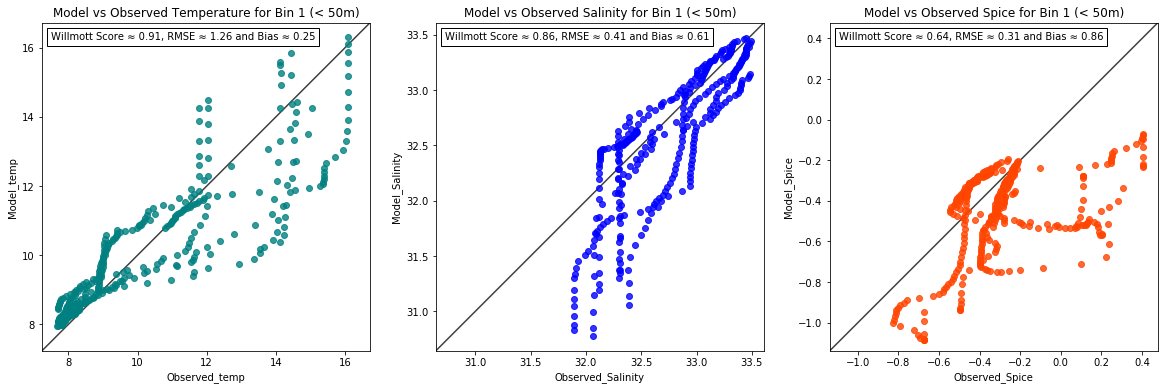

In [152]:
plot_stat_bin_1(obs_temp=tem_bin_1, model_temp=tem_bin_1_m, obs_sal=sal_bin_1, model_sal= sal_bin_1_m, \
          obs_spice= spic_bin_1, model_spice= spic_bin_1_m, z_data= z_bin_1)

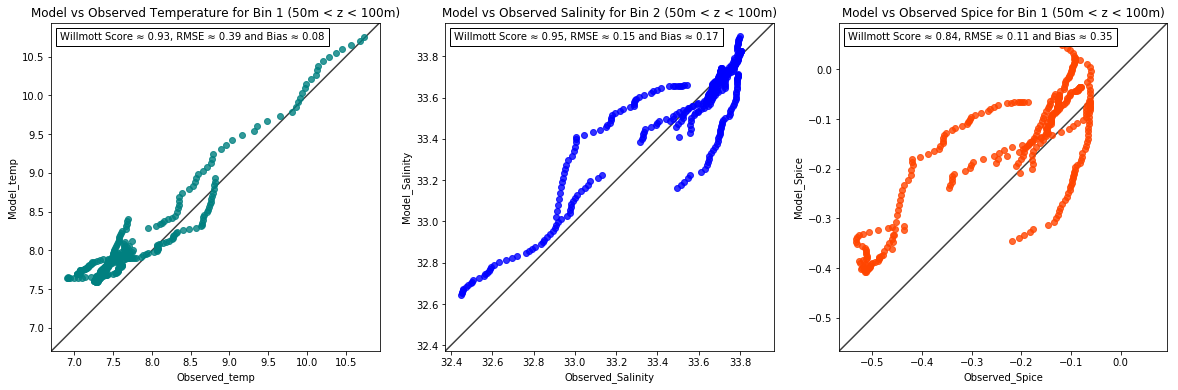

In [153]:
plot_stat_bin_2(obs_temp=tem_bin_2, model_temp=tem_bin_2_m, obs_sal=sal_bin_2, model_sal= sal_bin_2_m, \
          obs_spice= spic_bin_2, model_spice= spic_bin_2_m, z_data= z_bin_2)

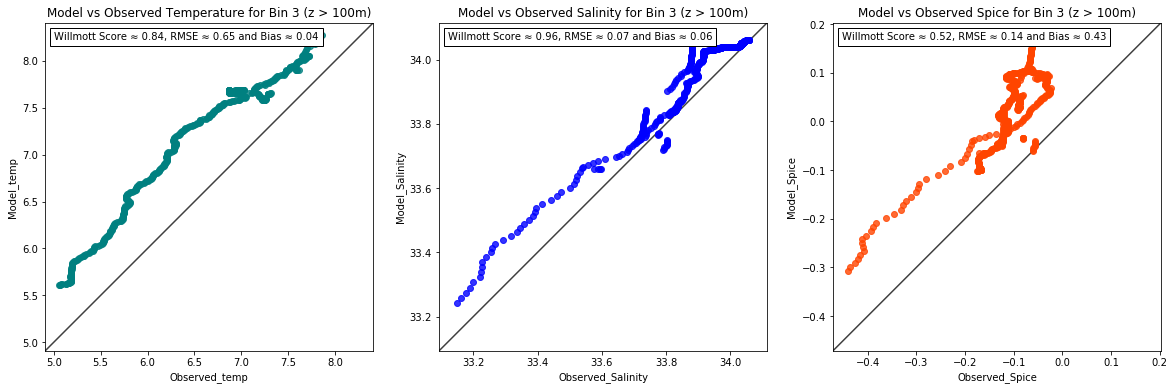

In [154]:
plot_stat_bin_3(obs_temp=tem_bin_3, model_temp=tem_bin_3_m, obs_sal=sal_bin_3, model_sal= sal_bin_3_m, \
          obs_spice= spic_bin_3, model_spice= spic_bin_3_m, z_data= z_bin_3)

### Q) SHould I take the time of sampling into consideration and interpolate the model data specifically for that time ??